# Exploring the UTx000 Extension Beacon Data
(Known as BPEACE2 in the [GH repo](https://github.com/intelligent-environments-lab/utx000))

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Evening IEQ Measurements
Now that we have parsed the beacon data into time periods corresponding to when participants were asleep, it would be interesting to analyze what concentrations are being experienced during the evening.

<div class="alert alert-block alert-warning">
    These data have not been filtered by GPS i.e. there might be some nights when participants are not home, which isn't too much of an issue considering we just want a look at nightly concentrations.

## Package Import

In [7]:
import os
import sys
sys.path.append('../')

from src.features import build_features
from src.visualization import visualize
from src.reports import make_report

import pandas as pd
import numpy as np

from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

## Data Import

In [25]:
iaq_night = pd.read_csv('../data/processed/bpeace2-fitbit-beacon-iaq-evening-full.csv',
                        index_col=0,parse_dates=True,infer_datetime_format=True)
iaq_night.head()

,TVOC,eCO2,Lux,Visible,Infrared,NO2,T_NO2,RH_NO2,CO,T_CO,...,PM_C_4,PM_C_10,z,Beacon,Beiwe,Fitbit,REDCap,start_time,end_time,beiwe
Timestamp,,,,,,,,,,,,,,,,,,,,,
2020-07-03 06:20:00,192.840000,405.36,0.0000,0.00,0.0,NaN,27.0,53.400000,-0.47992,NaN,...,16.400084,16.604594,0.162959,44,4i7679py,38,37,2020-07-03 06:20:00,2020-07-03 16:10:00,4i7679py
2020-07-03 06:25:00,178.866667,400.00,0.0000,0.00,0.0,NaN,27.0,52.833333,-0.30360,NaN,...,20.737945,21.006936,0.088227,44,4i7679py,38,37,2020-07-03 06:20:00,2020-07-03 16:10:00,4i7679py
2020-07-03 06:30:00,188.760000,401.40,0.9792,0.48,0.0,NaN,27.0,53.000000,-0.22436,NaN,...,16.946462,17.167753,0.114067,44,4i7679py,38,37,2020-07-03 06:20:00,2020-07-03 16:10:00,4i7679py
2020-07-03 06:35:00,193.840000,406.04,2.0400,1.00,0.0,NaN,27.0,53.000000,-0.26328,NaN,...,16.101073,16.309091,0.149835,44,4i7679py,38,37,2020-07-03 06:20:00,2020-07-03 16:10:00,4i7679py
2020-07-03 06:40:00,198.840000,409.44,2.0400,1.00,0.0,NaN,27.0,53.000000,-0.40936,NaN,...,19.142773,19.383442,0.163325,44,4i7679py,38,37,2020-07-03 06:20:00,2020-07-03 16:10:00,4i7679py


# Visualization
Some base visualizations

## Helper Functions

In [6]:
def create_cmap(colors,nodes):
    cmap = LinearSegmentedColormap.from_list("mycmap", list(zip(nodes, colors)))
    return cmap

## Heatmap per Beacon

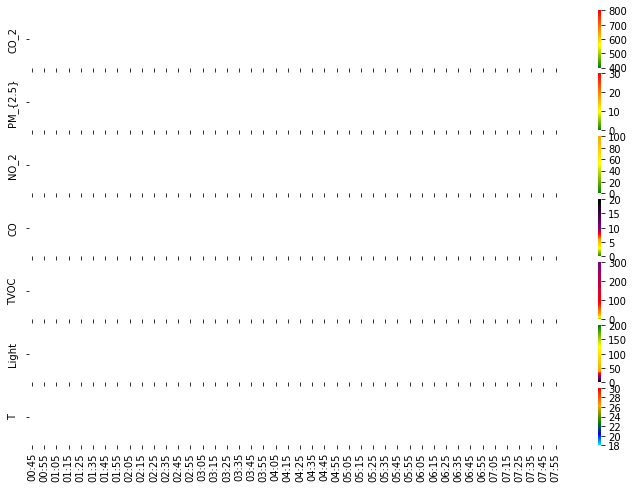

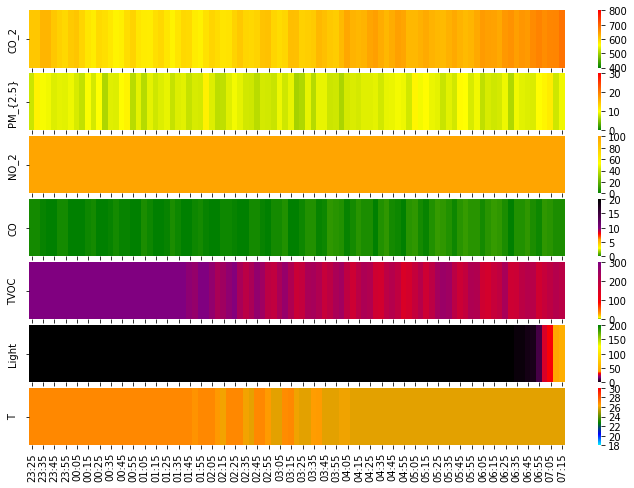

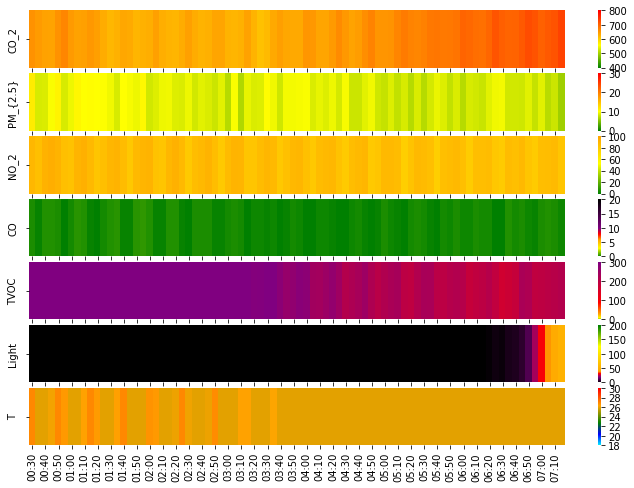

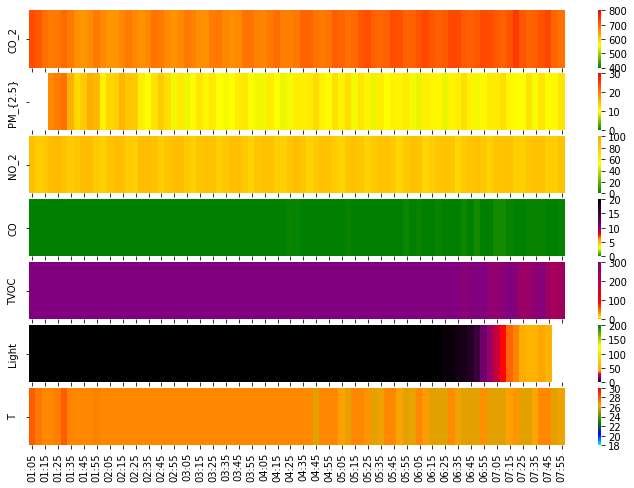

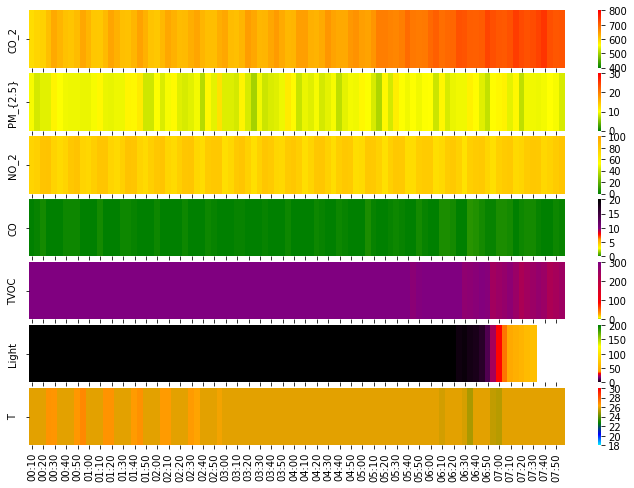

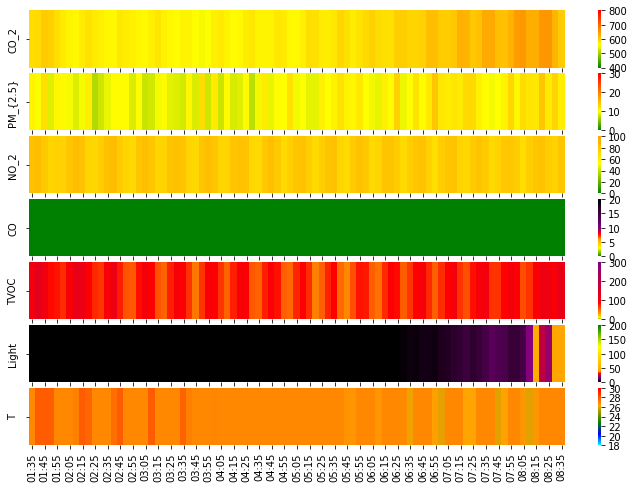

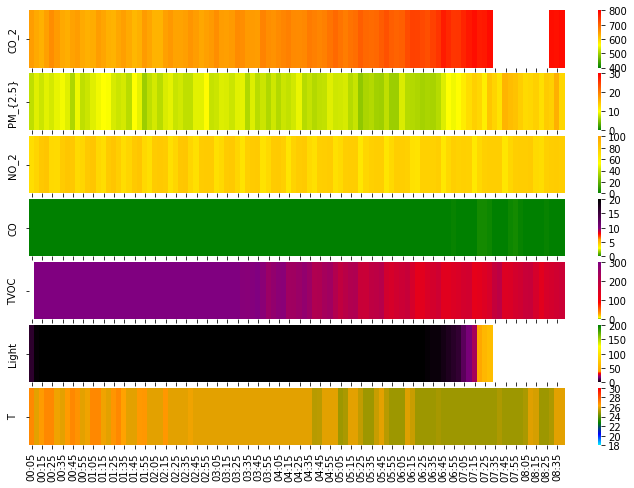

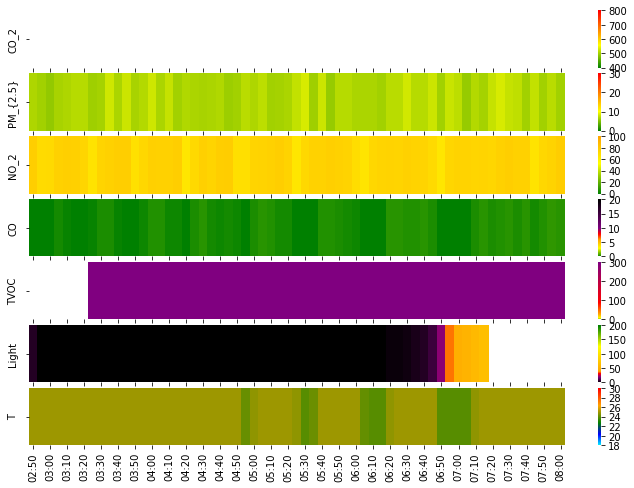

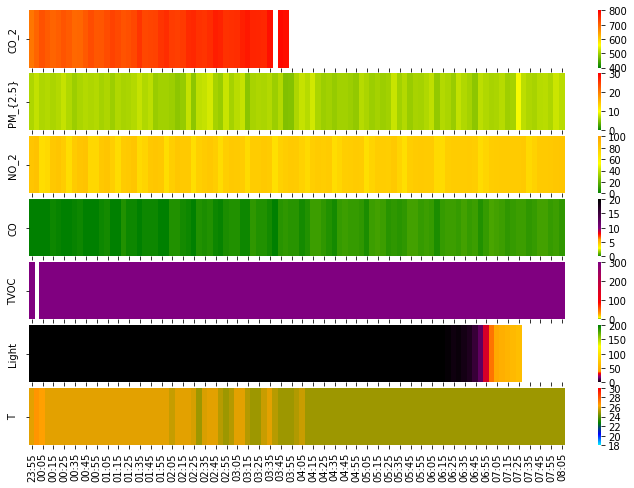

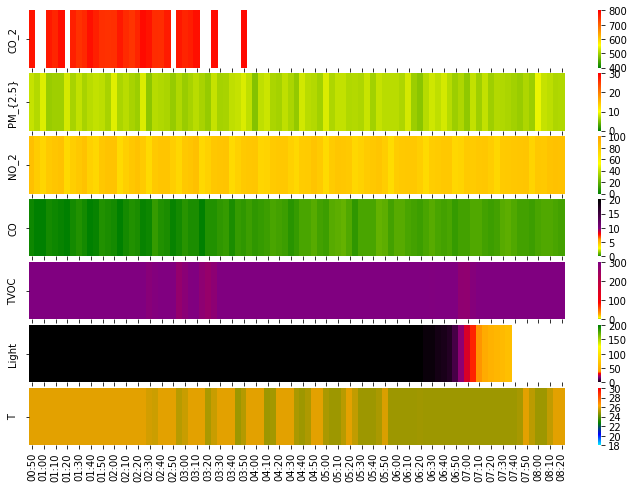

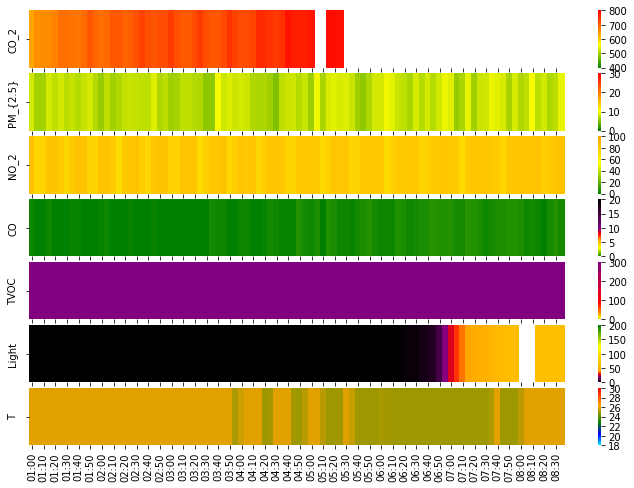

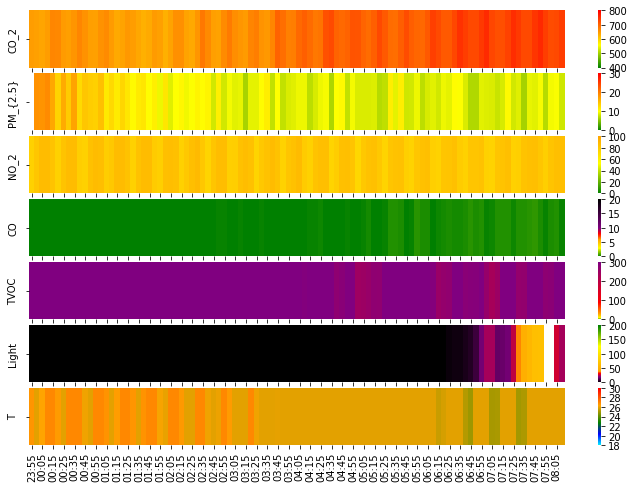

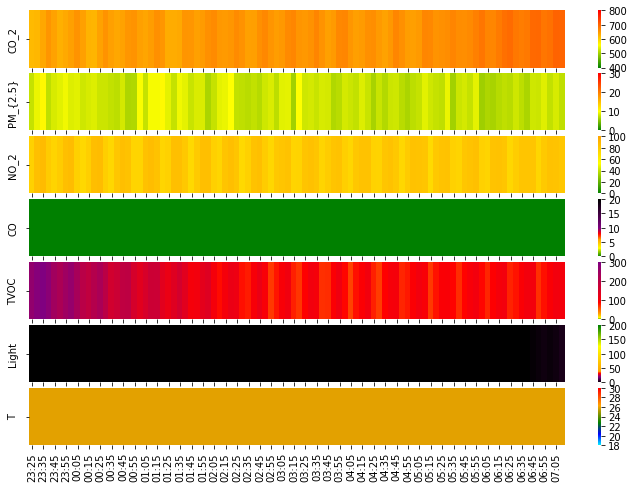

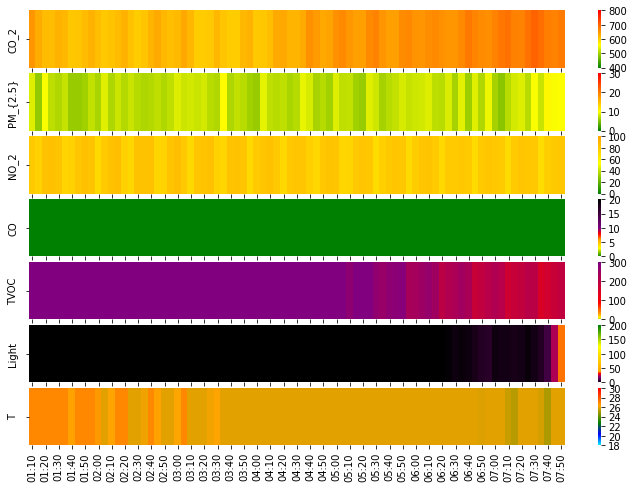

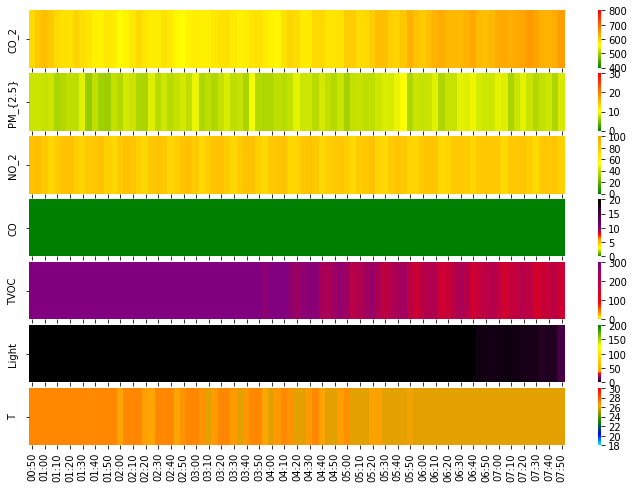

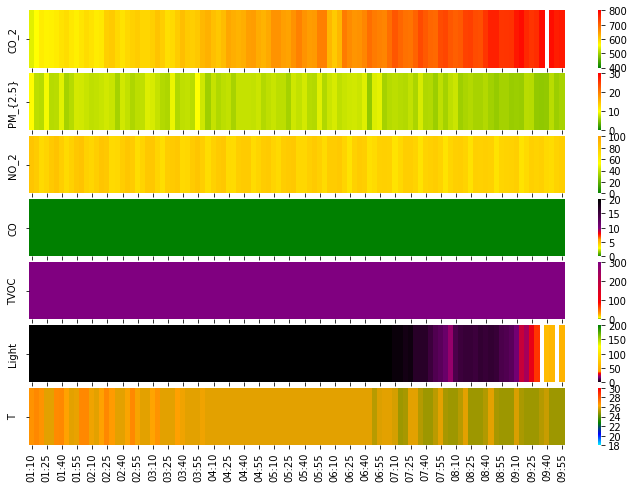

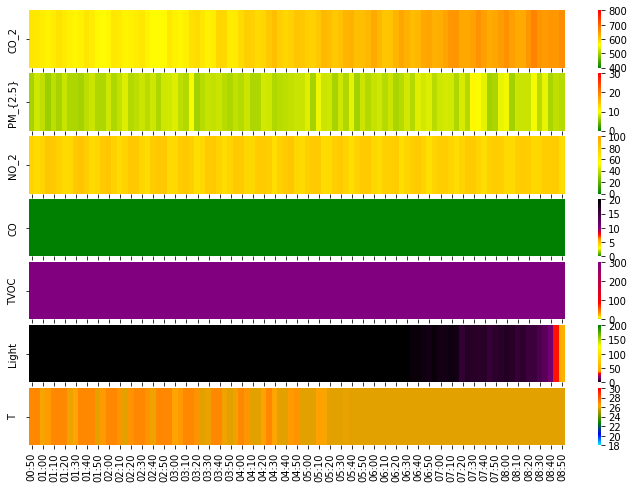

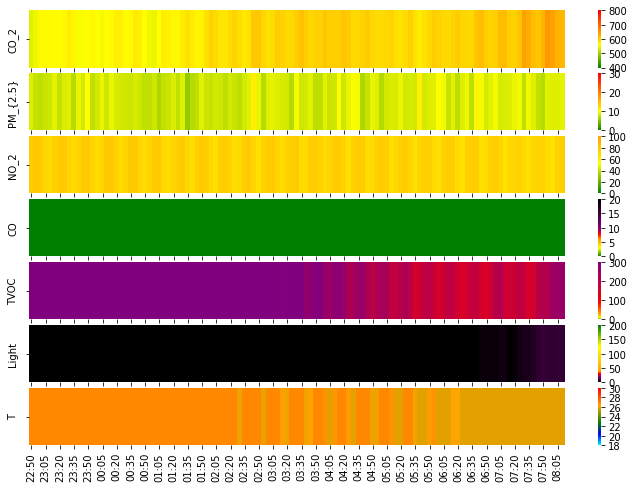

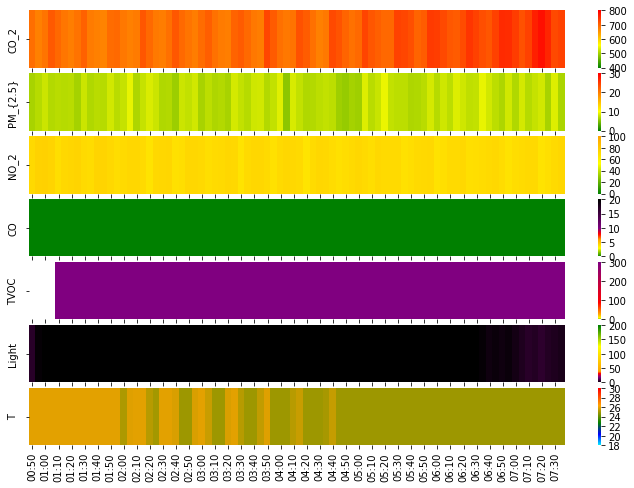

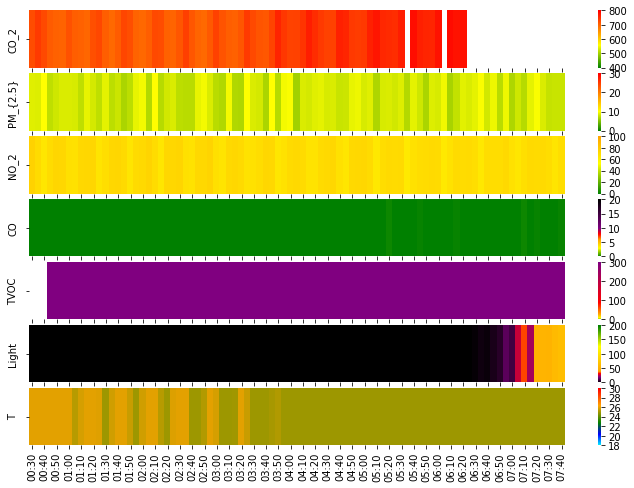

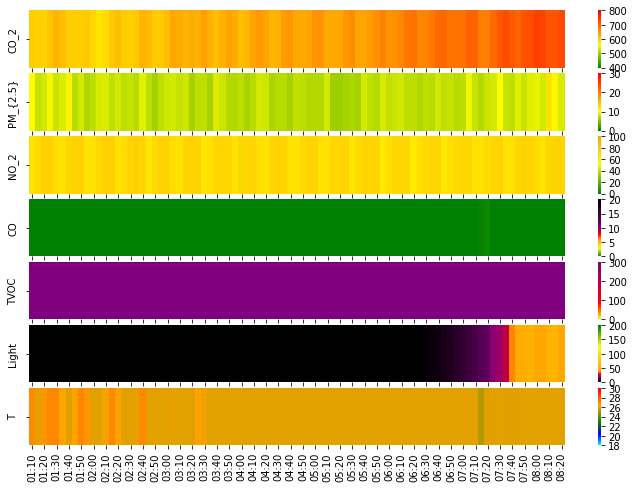

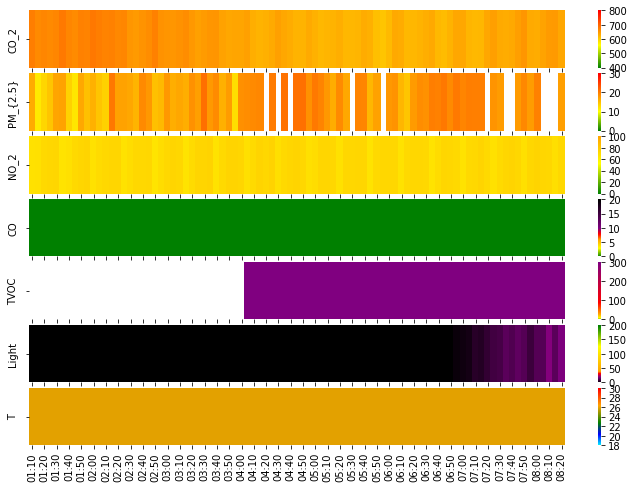

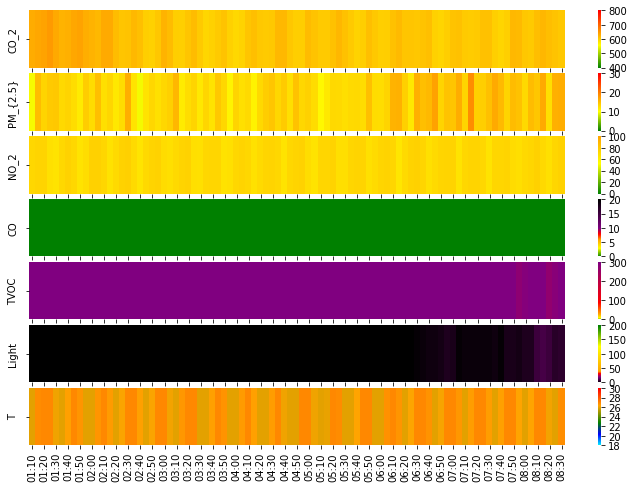

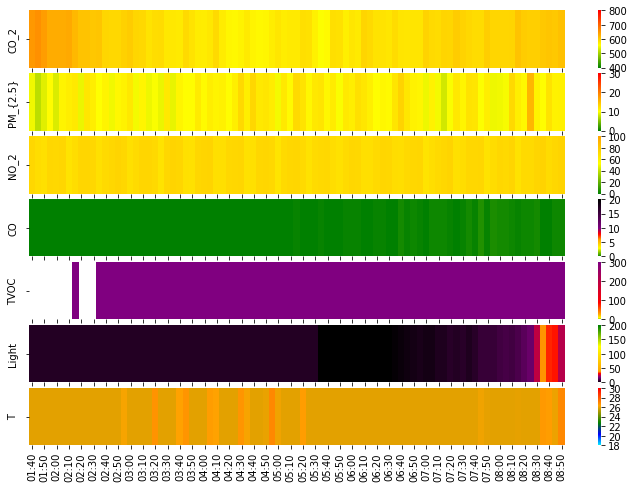

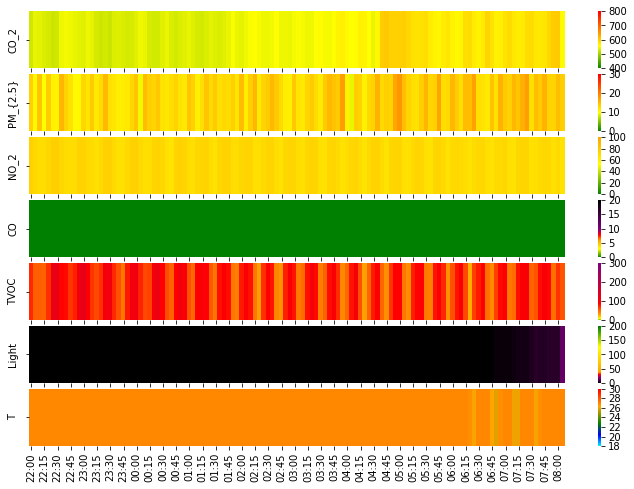

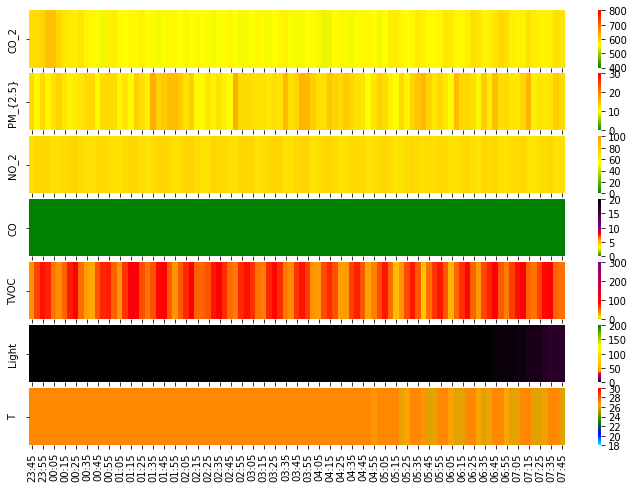

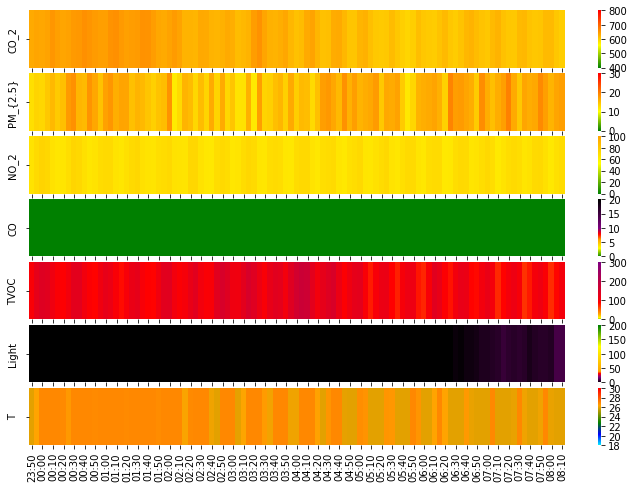

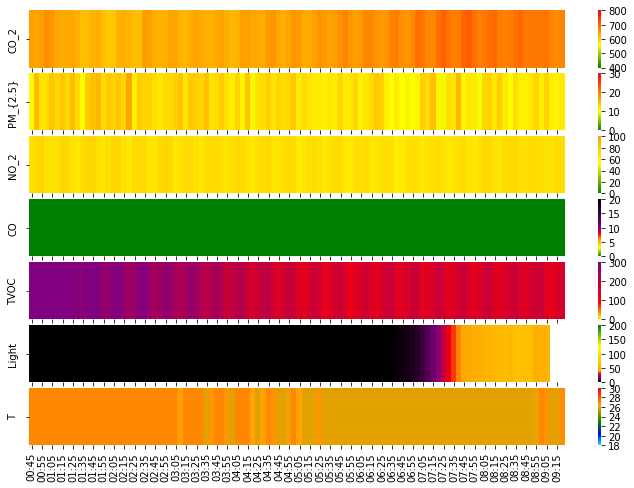

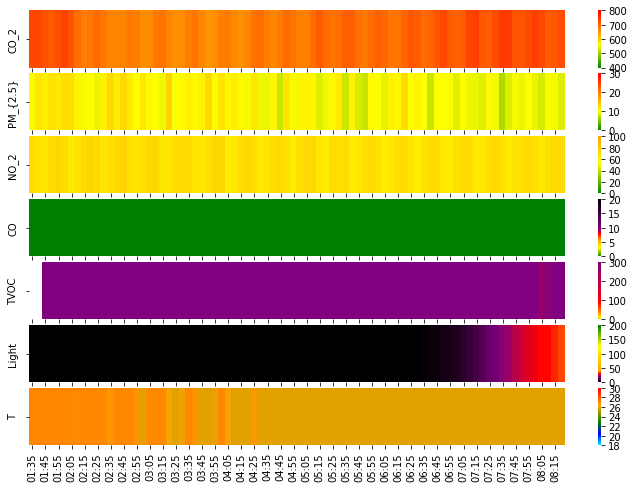

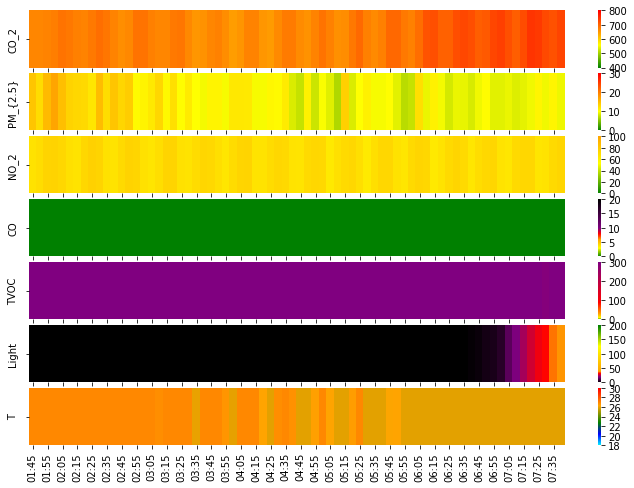

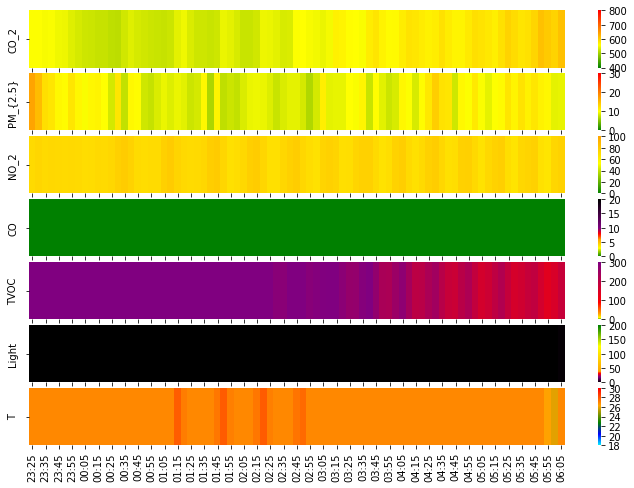

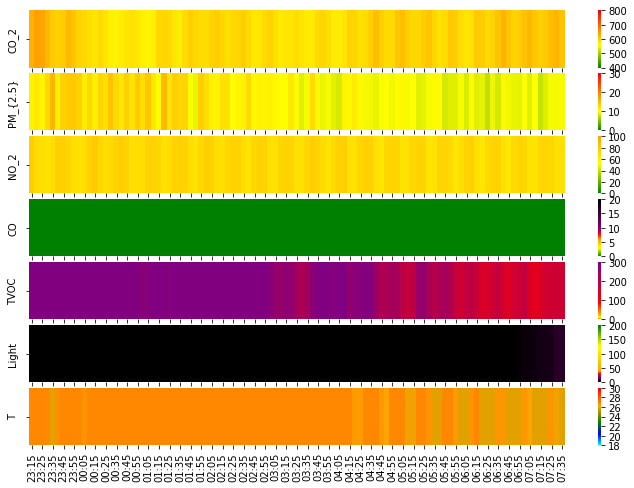

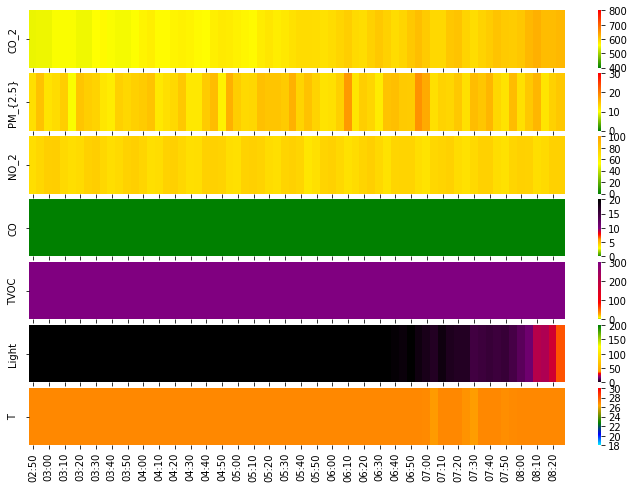

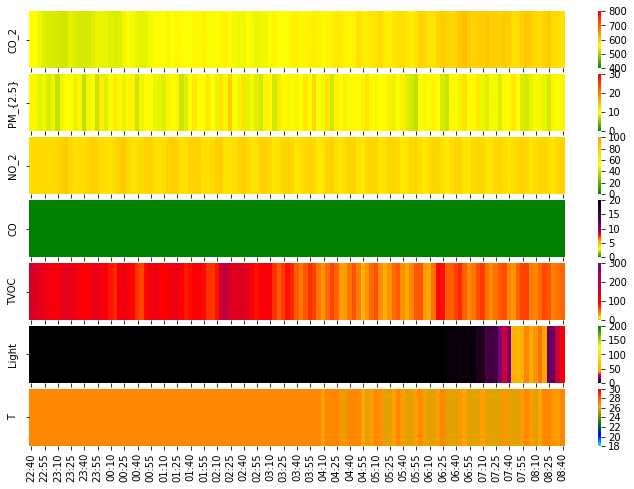

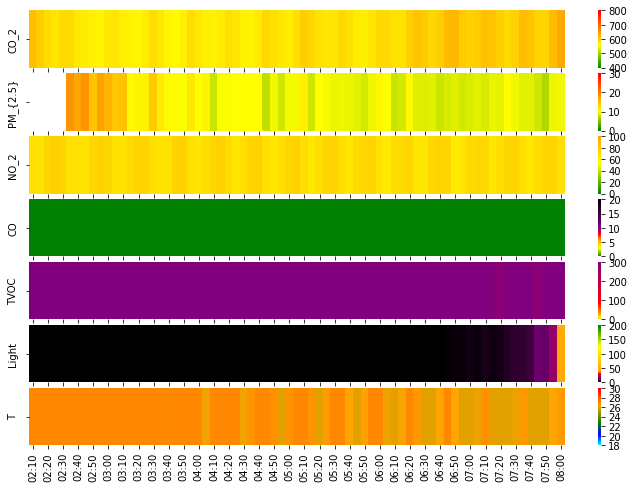

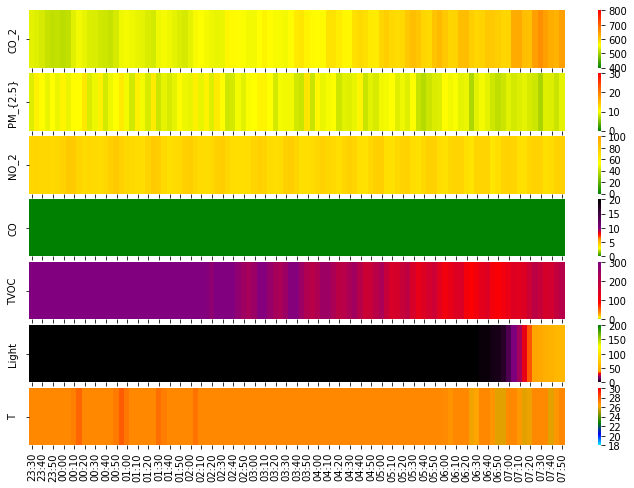

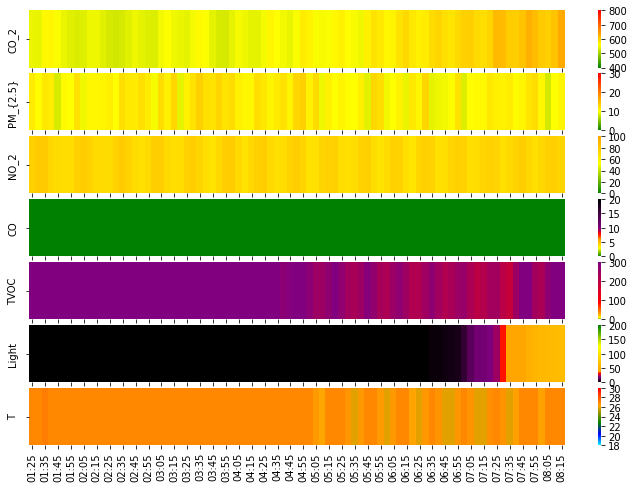

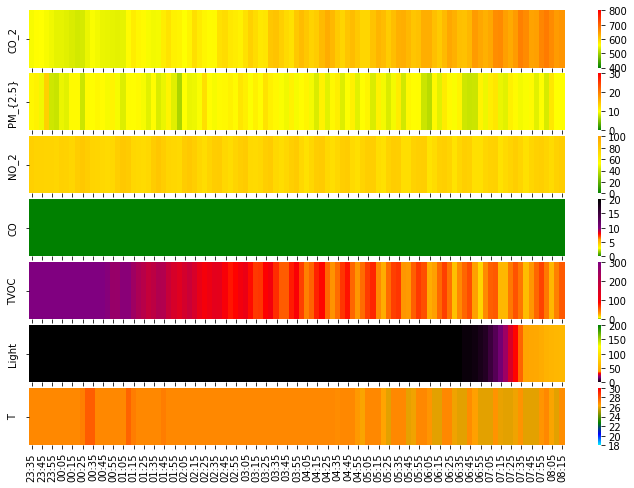

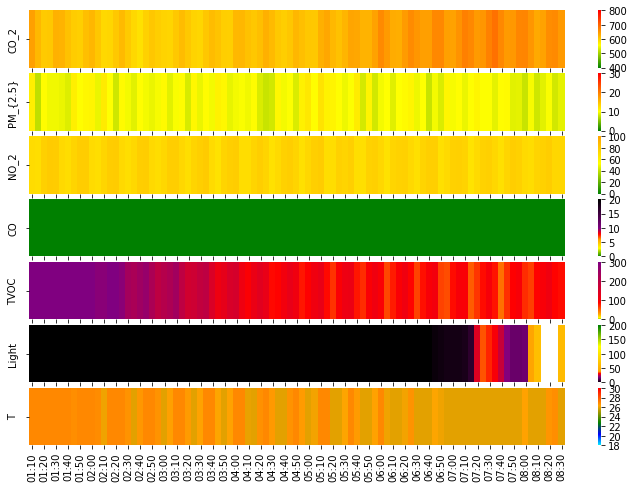

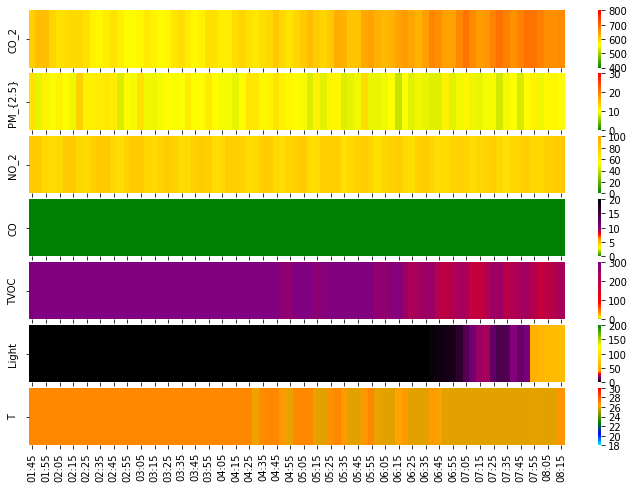

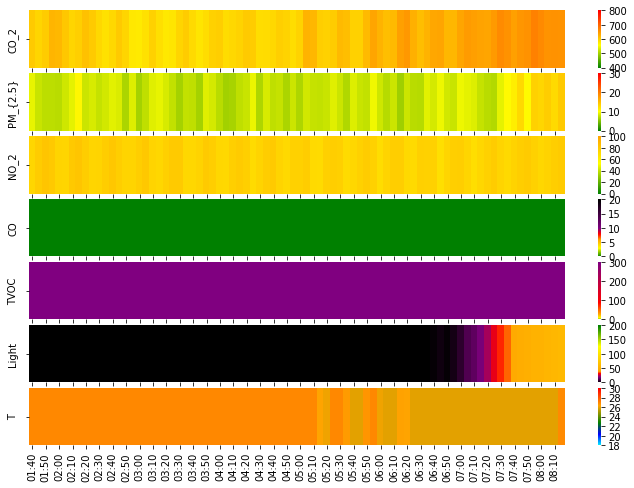

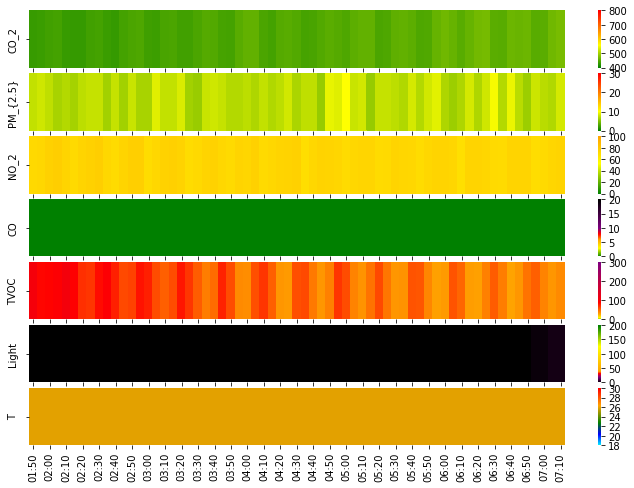

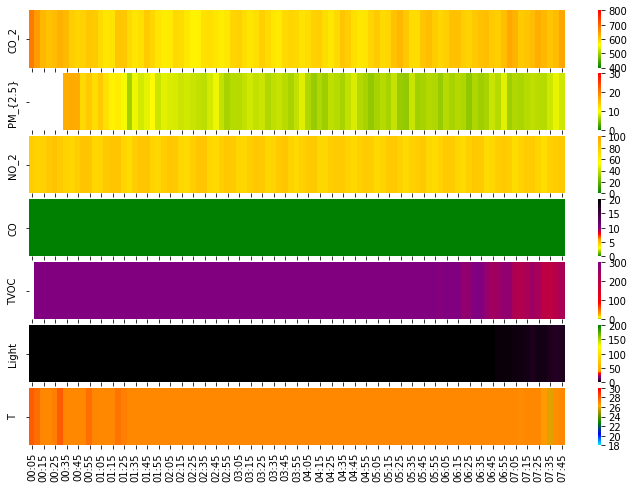

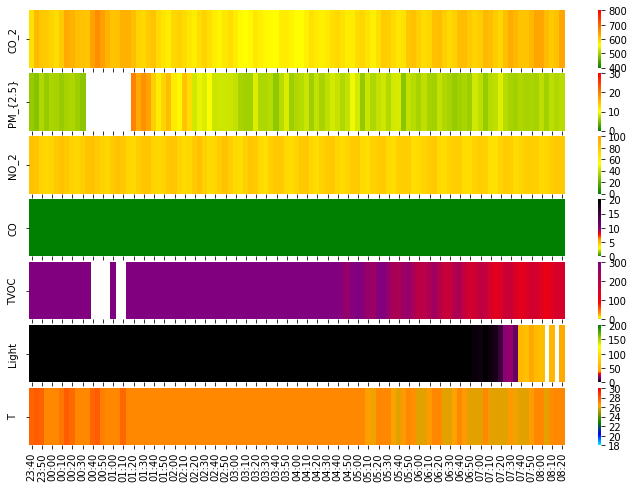

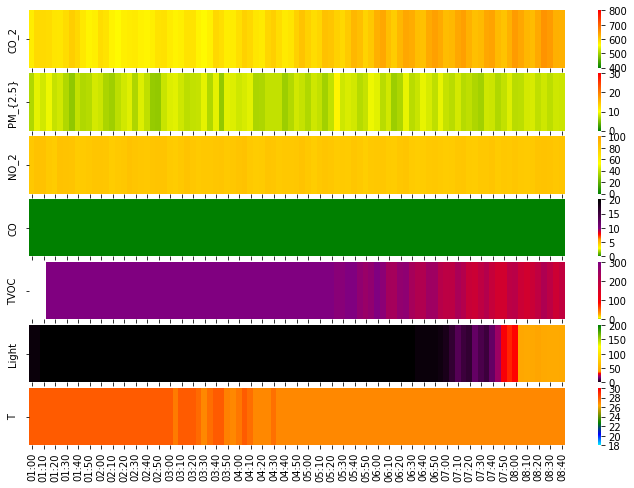

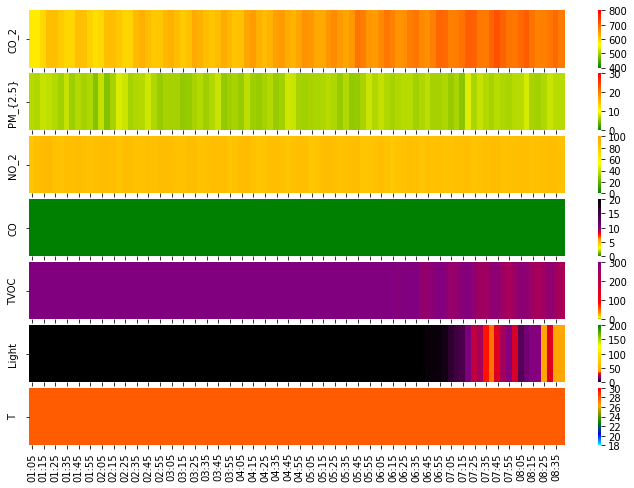

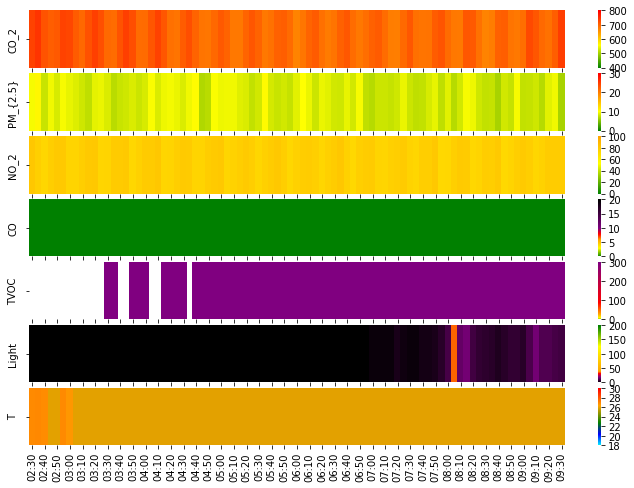

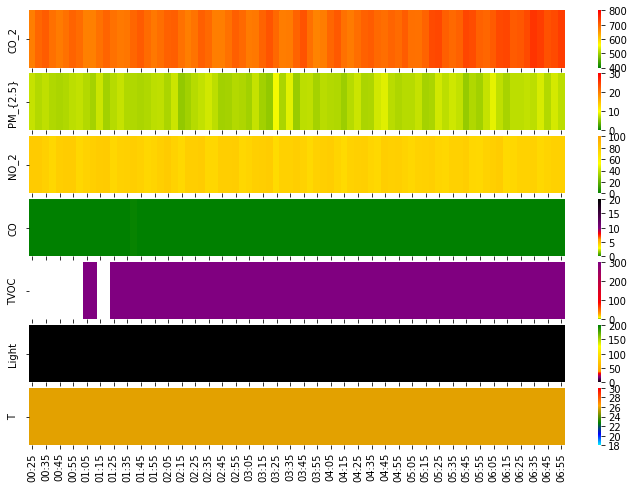

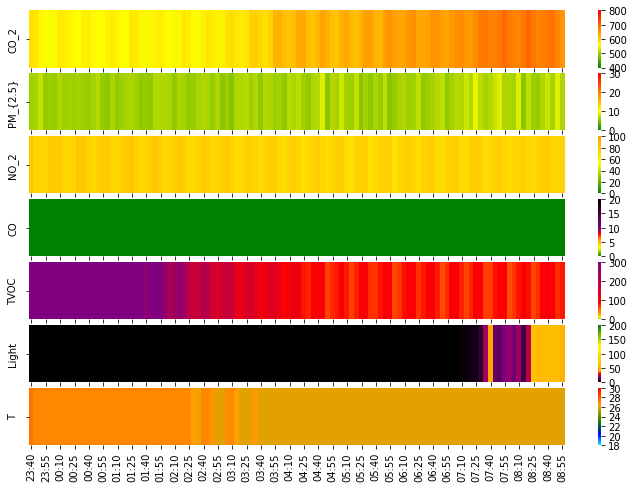

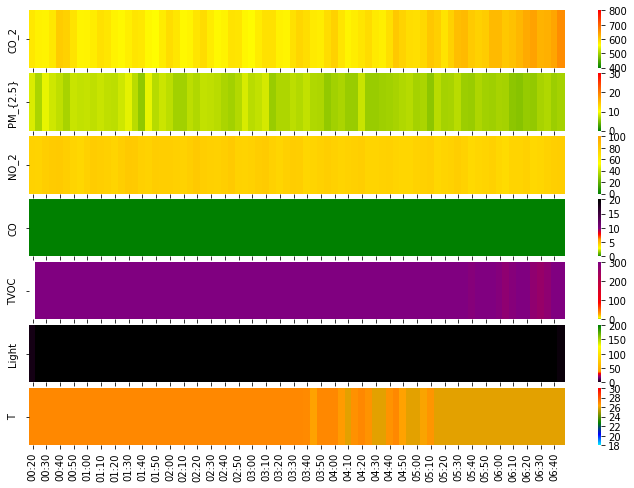

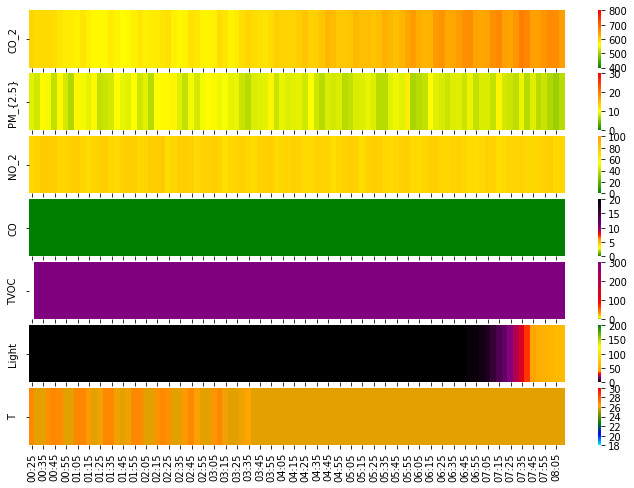

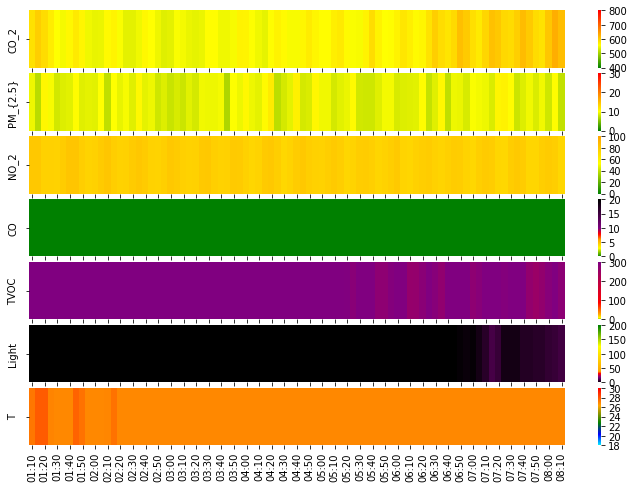

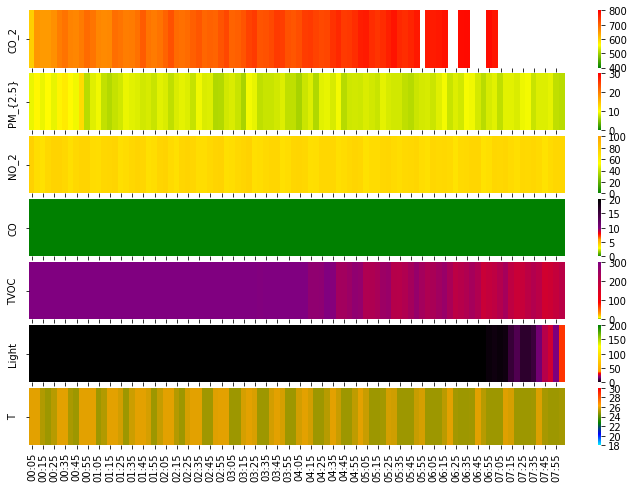

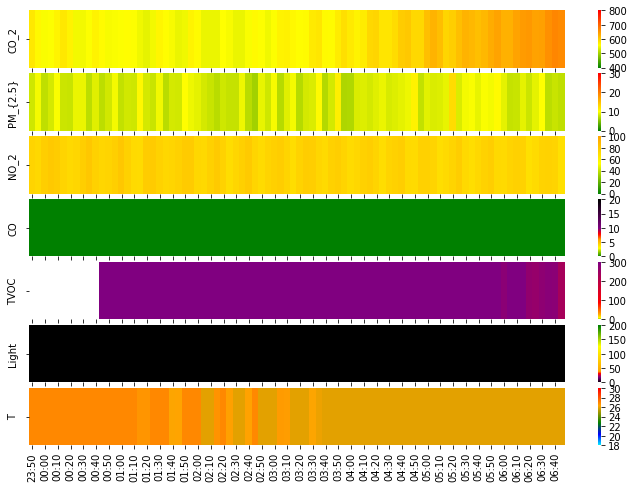

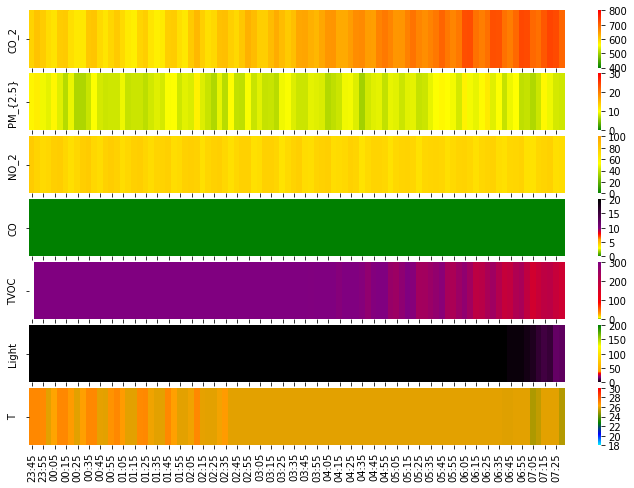

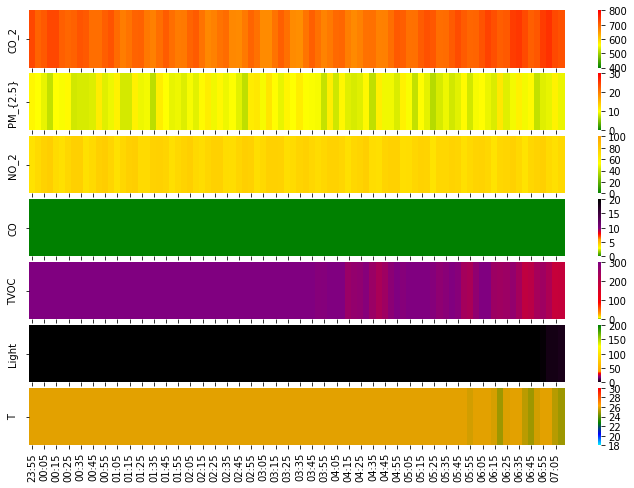

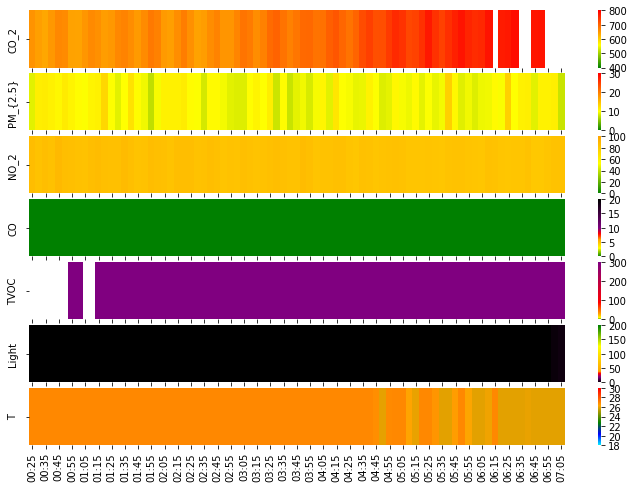

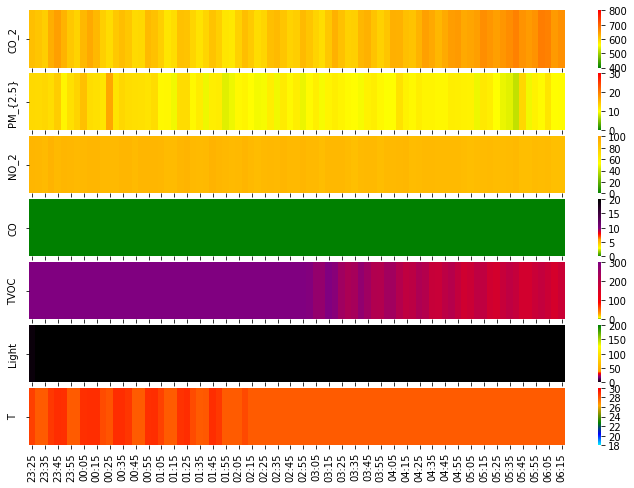

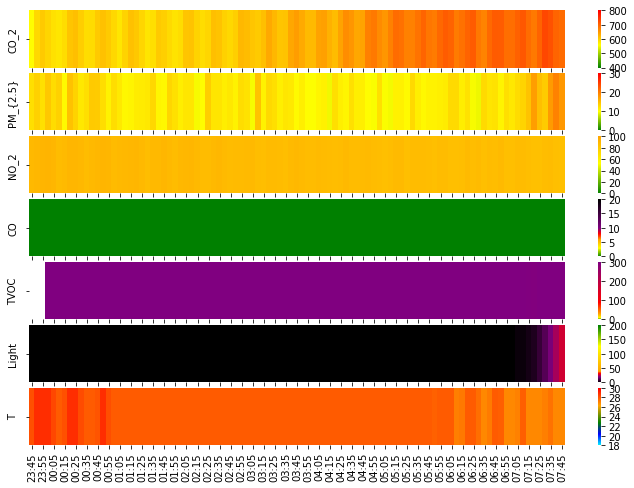

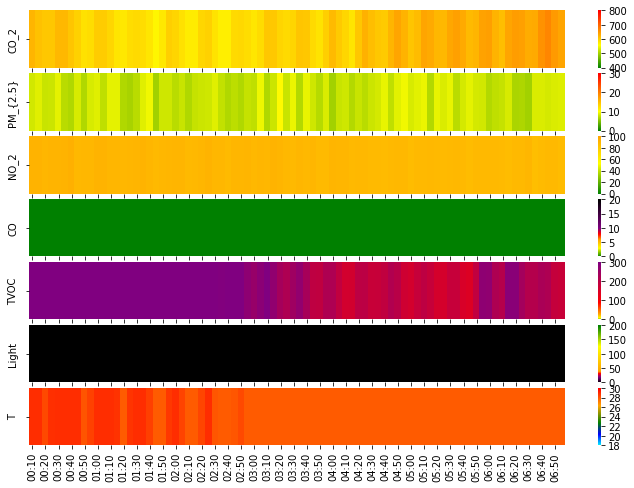

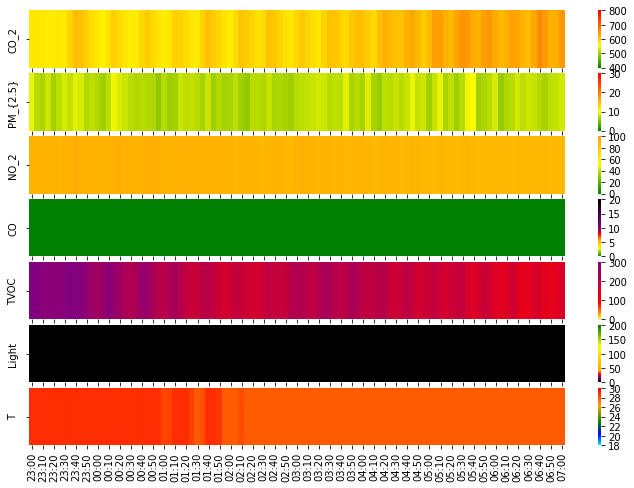

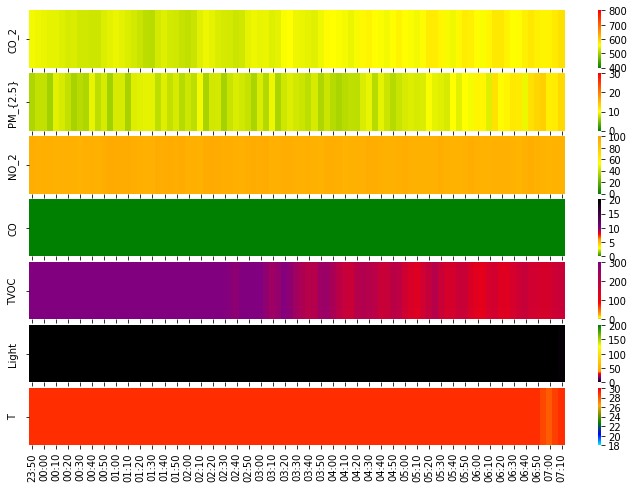

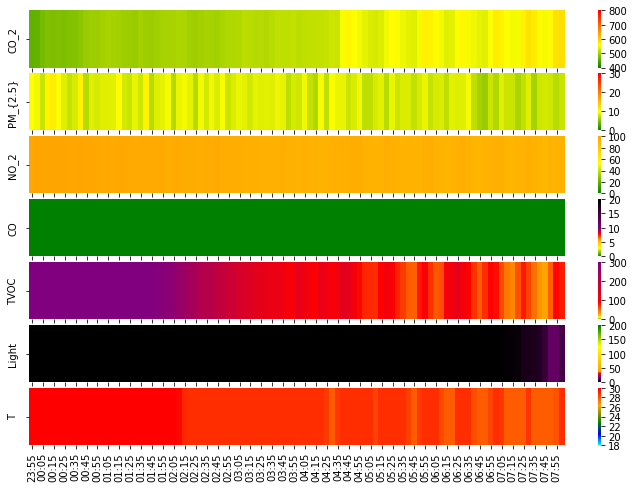

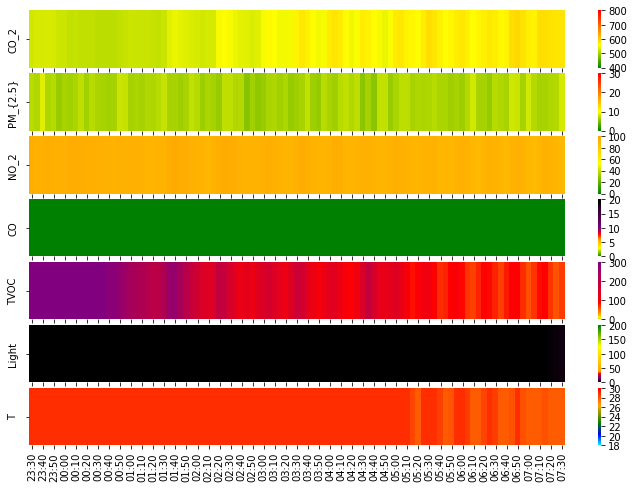

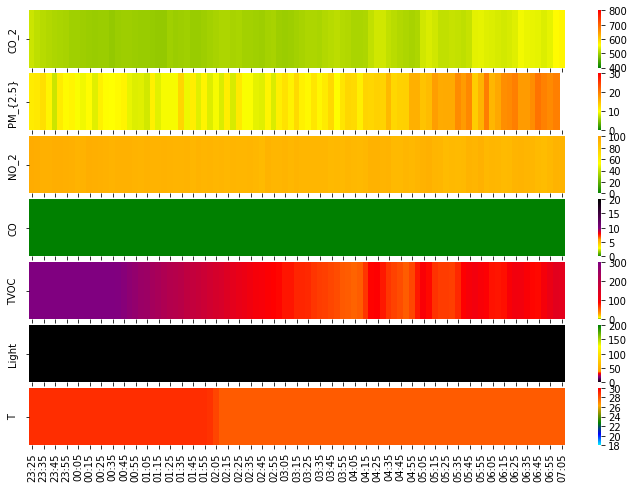

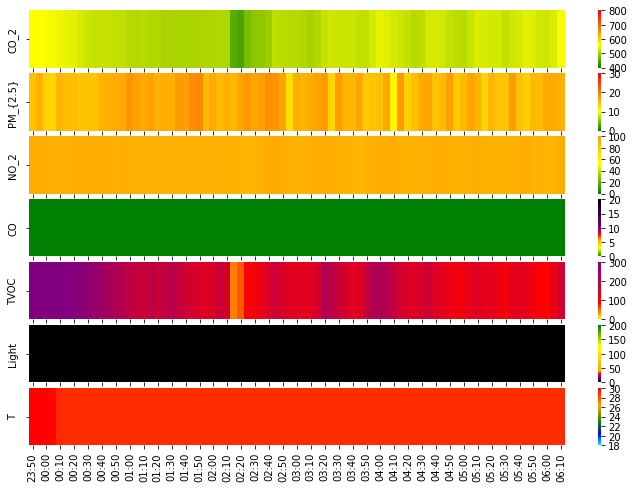

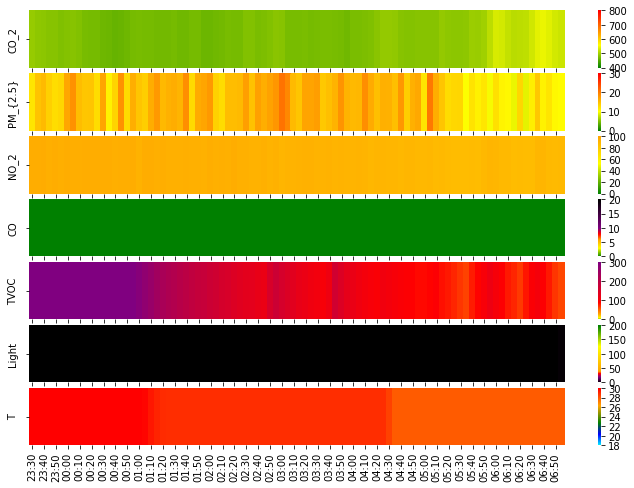

In [39]:
for pt in ['vr9j5rry']:
    iaq_night_beacon = iaq_night[iaq_night['Beiwe'] == pt]
    for night in iaq_night_beacon['start_time'].unique():
        single_night = iaq_night_beacon[iaq_night_beacon['start_time'] == night]
        single_night_pollutants = single_night[['CO2','PM_C_2p5','NO2','CO','TVOC','Lux','T_CO']]
        if len(single_night_pollutants['CO2'] > 10):
            fig, axes = plt.subplots(7,1,figsize=(12,8),sharex=True)
            ylabels = ['CO$_2$',
                       'PM$_{2.5}$',
                       'NO$_2$',
                       'CO',
                       'TVOC',
                       'Light',
                       'T']
            cbar_ticks = [np.arange(400,900,100),
                          np.arange(0,40,10),
                          np.arange(0,120,20),
                          np.arange(0,25,5),
                          np.arange(0,400,100),
                          np.arange(0,250,50),
                          np.arange(18,32,2)]
            cmaps = [create_cmap(["green", "yellow", "orange", "red",],[0.0, 0.4, 0.6, 1]),
                     create_cmap(["green", "yellow", "red"],[0.0, 0.34, 1]),
                     create_cmap(["green", "yellow", "orange"],[0.0, 0.53, 1]),
                     create_cmap(["green", "yellow", "orange", "red", "purple", "black"],[0.0, 0.15, 0.3, 0.4, 0.5, 1]),
                     create_cmap(["green", "yellow", "orange", "red", "purple"],[0.0, 0.03, 0.1, 0.3, 1]),
                     create_cmap(["black","purple","red","orange","yellow","green"],[0.0, 0.1, 0.16, 0.2, 0.64, 1]),
                     create_cmap(["cyan","blue","green","orange","red"],[0.0, 0.2, 0.4, 0.7, 1])]
            for ax, var, low, high, ylabel, ticks, cmap in zip(axes,single_night_pollutants.columns,[400,0,0,0,0,0,18],[800,30,100,20,300,200,30],ylabels,cbar_ticks,cmaps):
                sns.heatmap(single_night_pollutants[[var]].T,vmin=low,vmax=high,ax=ax,cbar_kws={'ticks':ticks},cmap=cmap)
                ax.set_ylabel(ylabel)
                ax.set_yticklabels([''])
                ax.set_xlabel('')

            xlabels = ax.get_xticklabels()
            new_xlabels = []
            for label in xlabels:
                new_xlabels.append(label.get_text()[11:16])

            ax.set_xticklabels(new_xlabels)
            plt.subplots_adjust(hspace=0.1)
            plt.show()
            plt.close()